- [sns.regplot(data=, x='', y='')](#regplot) for simple linear regression
- [np.polyfit(X, y, deg=)](#polyfit) to find theta_0, theta_1 .. parameters
- [from sklearn.model_selection import train_test_split](#traintestsplit)
- [the general framework code for essentially any supervised learning algorithm within sklearn](#framework)

---

Chapter 3.1 _ The book ISLR
<br>https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0

---

In [28]:
# "Zero" is the usual name for the number 0 in English. In British English "nought" is also used.

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We want to find out, is there a relationship between how much we're spending on advertising versus the results we get in sales?

Obviously, if there is no correlation there, we probably don't want to spend any money on advertising.

As we're dealing with simple linear regression, we're limited to just a single feature X.
<br>What we could do is just combine all of these into total spend.

In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [10]:
df.shape

(200, 5)

---

Let's visually explore if there appears to be a relationship between total advertising spend and sales.

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

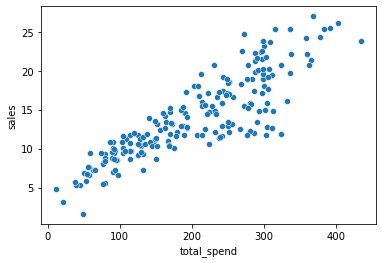

In [6]:
sns.scatterplot(data=df, x='total_spend', y='sales')

I can see that the more I spend on advertising, the likelihood is that I'm going to get more sales.
<br>So there does appear to be a relationship between total advertising spend and sales.

---

<a id='regplot'></a>
### `sns.regplot()`

In the seaborn library exists a sns.regplot(), which is a regression line plot.
<br>For the case of simple linear regression, where you just have one y vector and one x feature, seaborn is actually able to plot out a regression line using ordinary least squares.

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

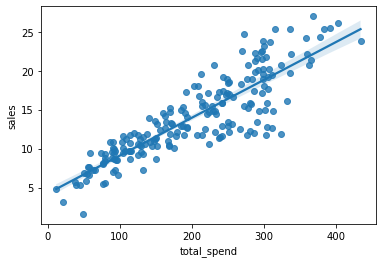

In [7]:
sns.regplot(data=df, x='total_spend', y='sales')

---

<a id='polyfit'></a>
### `np.polyfit()`

In [8]:
X = df['total_spend']
y = df['sales']

In [11]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

- __np.polyfit() function__ does a least squares polynomial fit. And the reason it does a polynomial fit is because you actually have the option of not just fitting to X, but also fitting to X squared or X cubed in addition to X. 
- In our case, we're just going to say degree of the polynomial is equal to 1.
- And what np.polyfit() __returns__ are the set of __coefficients__ solved by __ordinary least squares__.
- And it returns them in order of the highest order coefficient to least.

---

In [14]:
# y = B1x + B0     

# create an equation for the best fitting line for this real set of data points

In [15]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

---

__our manual calculation and plotting__

In [19]:
potential_spend = np.linspace(0, 500, 100) # some theoretical potential spend in advertising

# And the reason we chose 0 to five hundred is because more or less, that's the range of our dataset.

Now what I'm going to do is calculate my predicted sales for each of these potential spend values.

In [20]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

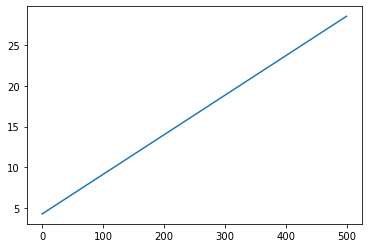

In [22]:
plt.plot(potential_spend, predicted_sales) # I get this regression line.

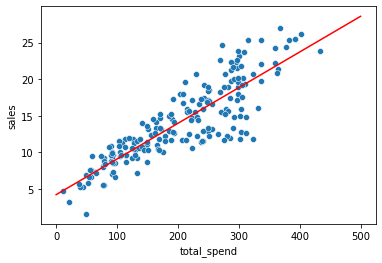

In [24]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red')

---
---

We just fit y = mx + b, but we could be fitting to higher degree polynomials.

In [25]:
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [27]:
# we actually just solved the equation

# y = B3x**3 + B2x**2 + B1x + B0

# high level polynomial model

And keep in mind, if there is actually less information on something like X cubed or X squared, essentially saying that there's no real higher order relationship there, then these beta coefficient values are going to get quite small.

You'll notice that the relationship for X cubed versus y is almost non-existent.
<br>The way we know this is that the beta coefficient here is three point zero seven times ten to the power of negative seven (3.07615033e-07). This is actually almost zero or very close to it, which essentially says go ahead and don't even consider X cubed because it's not really a factor here.

In [29]:
pot_spend = np.linspace(0, 500, 100)

In [30]:
pred_sales = 3.07615033e-07 * pot_spend**3 - 1.89392449e-04 * pot_spend**2 + 8.20886302e-02 * pot_spend + 2.70495053e+00

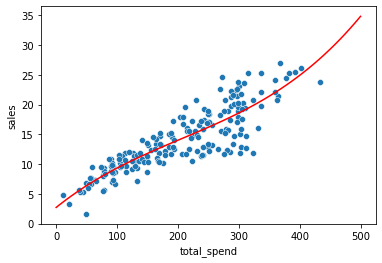

In [32]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(pot_spend, pred_sales, color='red')

---

- All a __machine learning algorithm__ does is __estimate some output__.

- Now, let's talk about the philosophy behind Scikit-Learn.
<br>In general, __Scikit-Learn's approach__ to model building focuses on __applying models__ and __performance metrics__.
<br>Essentially, we're going to __train a model on some data__ and __then check its performance on a set of data that it hasn't seen before__, at least for supervised learning.

- Recall from our discussion on the supervised machine learning process that we need to perform a __train | test split__ for supervised learning in order to fairly evaluate our model.

----

<a id='traintestsplit'></a>

<img src='Screenshot 2022-06-07 052439.png' width=800>

---

So we have ___sklearn_ as the main library__ and then we have ___model_selection_ within Scikit-Learn__, we're going to import the ___train_test_split_ function__.

In [34]:
from sklearn.model_selection import train_test_split

And what the __train_test_split function__ does is it __takes in your X features__, that is __all of them__ and __all your corresponding y labels__, and then it __creates the four components for you__.
<br>And notice here, this is just __tuple unpacking__.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

---
---

<a id='framework'></a>
And right here is the __general framework code__ for essentially __any supervised learning algorithm within sklearn__.

<img src='genframe.png'>

After importing you create an instance of that model, we could also go and edit parameters of our model so we could define any specific parameters we want for the algorithm we're working with.